In [34]:
import numpy as np # Linear algebra
import pandas as pd # data processing, CSV file Input 

In [35]:
df=pd.read_csv('C:/9-AI_datasets/Churn_modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [36]:
df.shape
#Total 10 thoustand data and 14 columns 

(10000, 14)

RowNumber CustomerId and Surname are not useful hence Dropped

In [37]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [39]:
df.isnull()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Gender and Geograph are object type we need to convert in numerical form

In [41]:
# is there any duplicate row
df.duplicated().sum()

0

There are 0 duplicated value

In [42]:
#Let us check how many customers have left the bank
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

7963 customers have left the bank

In [43]:
# Let us check how many customers are form which geography
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

There are less customers from Spain and more are from France 

In [44]:
#let us check how many males and how many females are there
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [45]:
#we want to convert Grography and Gender which is an object type convert into integer
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first =True)

In [46]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Here Geography France is Dropped and male column is Dropped

In [47]:
#Assign all features to X and Target column as Y
#Divide the data into train and test
x = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

80% data used for Training and 20% used for testing

In [48]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [49]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [50]:
x_train.shape

(8000, 11)

There are 11 columns are used for Testing and 8000 data points for training

In [51]:
#Let us make uniform scaling of all features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_trf = scaler.fit_transform(x_train)
x_test_trf = scaler.transform(x_test)

### Artificial Neural Network Model (ANN)

In [52]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [53]:
# Now let us Define ANN Model
model = Sequential()
model.add(Dense(3,activation='sigmoid', input_dim=11))

model.add(Dense(1,activation='sigmoid'))

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [55]:
#input links are 3 and 11 features are applied, total 11x3

Let us compile the model

In [56]:
model.compile(optimizer='Adam', loss='binary_crossentropy')

In [58]:
#Training the model
history = model.fit(x_train_trf, y_train, epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.5963
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5115
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4773
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4676
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4593
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4585
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4479
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4367
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4286
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4298


Lets check final weights after training

In [59]:
model.layers[0].get_weights()

[array([[ 3.0322459e-01, -1.2489488e-02,  3.6937028e-01],
        [-9.4991547e-01, -2.0026824e+00,  5.2145147e-01],
        [-1.6823564e-01,  3.9393964e-01, -4.3368205e-01],
        [-3.1885374e-01,  7.1920715e-02,  6.3020283e-01],
        [ 9.9106736e-02,  3.6073226e-01,  1.4408189e-01],
        [ 2.9858686e-02,  1.1858833e-01,  1.9237860e-01],
        [ 5.3496599e-01,  5.0191379e-01, -1.1802659e+00],
        [-1.6497016e-02, -9.6986063e-02,  1.1251188e-01],
        [-7.4131137e-01, -3.0036572e-01,  1.9878598e-01],
        [-6.9159910e-02,  1.6311830e-04,  8.4590875e-02],
        [ 3.5615599e-01,  2.4315725e-01, -1.0017382e+00]], dtype=float32),
 array([ 0.33717525,  0.5411594 , -0.28064647], dtype=float32)]

In [60]:
model.layers[1].get_weights()

[array([[-1.6864216],
        [-1.0477486],
        [ 0.5826238]], dtype=float32),
 array([-0.2704392], dtype=float32)]

In [61]:
#3 weights and 1 bias

In [62]:
y_log = model.predict(x_test_trf)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [63]:
y_log

array([[0.23566103],
       [0.35414526],
       [0.16076897],
       ...,
       [0.17893434],
       [0.13138284],
       [0.21871254]], dtype=float32)

In [64]:
#The result produced is in terms of probability, bcz the activation function used is sigmoid
#If the output < 0.5 the output 0 means customer will leave tha bank
#If output > 0.5 then 1 means customer will retain the bank

In [65]:
y_pred = np.where(y_log > 0.5,1,0)

In [66]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8165

Let us increase the no. of nodes and layers also

In [68]:
model = Sequential()
model.add(Dense(11,activation='relu', input_dim=11))
model.add(Dense(11,activation='relu', input_dim=11))

model.add(Dense(1,activation='sigmoid'))

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
# 11x11+11 bias, 11x11+11 bias, 11x1+1 bias = 276

In [70]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [72]:
history=model.fit(x_train_trf, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7826 - loss: 0.5508 - val_accuracy: 0.7969 - val_loss: 0.4699
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7999 - loss: 0.4586 - val_accuracy: 0.7975 - val_loss: 0.4423
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7942 - loss: 0.4399 - val_accuracy: 0.8075 - val_loss: 0.4315
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8101 - loss: 0.4239 - val_accuracy: 0.8219 - val_loss: 0.4221
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8207 - loss: 0.4119 - val_accuracy: 0.8263 - val_loss: 0.4121
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8329 - loss: 0.3880 - val_accuracy: 0.8350 - val_loss: 0.3991
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8484 - loss: 0.3779 - val_accuracy: 0.8375 - val_loss: 0.3873
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8446 - loss: 0.3737 - val_accu

In [74]:
y_log = model.predict(x_test_trf)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [75]:
y_pred = np.where(y_log>0.5,1,0)

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.86

Now accuracy has been improved compared to earlier one

In [77]:
history.history

{'accuracy': [0.792187511920929,
  0.7959374785423279,
  0.8006250262260437,
  0.811718761920929,
  0.8220312595367432,
  0.8326562643051147,
  0.8423437476158142,
  0.8496875166893005,
  0.85546875,
  0.854687511920929,
  0.8581249713897705,
  0.8573437333106995,
  0.8567187786102295,
  0.8571875095367432,
  0.8584374785423279,
  0.8592187762260437,
  0.8587499856948853,
  0.8610937595367432,
  0.8592187762260437,
  0.8607812523841858,
  0.8615624904632568,
  0.8603125214576721,
  0.8610937595367432,
  0.862500011920929,
  0.8609374761581421,
  0.8623437285423279,
  0.8609374761581421,
  0.8623437285423279,
  0.8626562356948853,
  0.8628125190734863,
  0.8621875047683716,
  0.8612499833106995,
  0.8639062643051147,
  0.8629687428474426,
  0.8639062643051147,
  0.8623437285423279,
  0.8615624904632568,
  0.8628125190734863,
  0.8634374737739563,
  0.8629687428474426,
  0.8642187714576721,
  0.8635937571525574,
  0.8621875047683716,
  0.862500011920929,
  0.8635937571525574,
  0.8646875

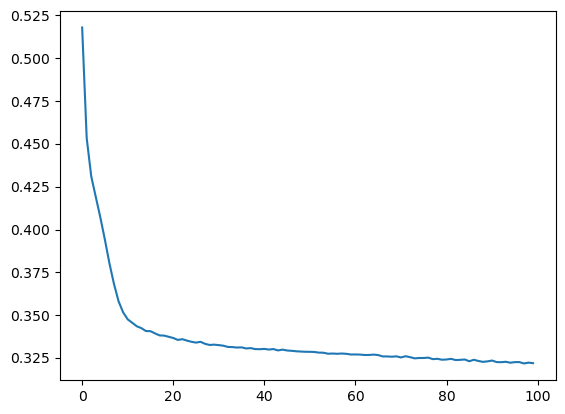

In [78]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])

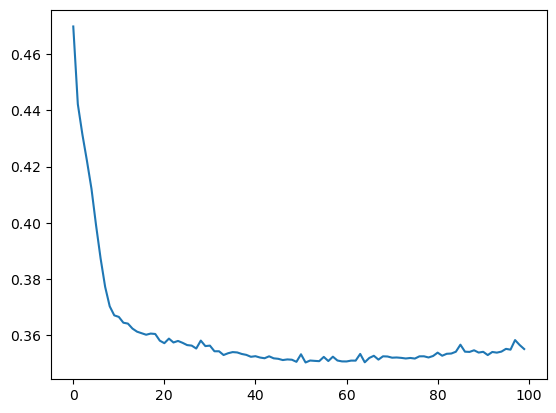

In [79]:
plt.plot(history.history['val_loss'])

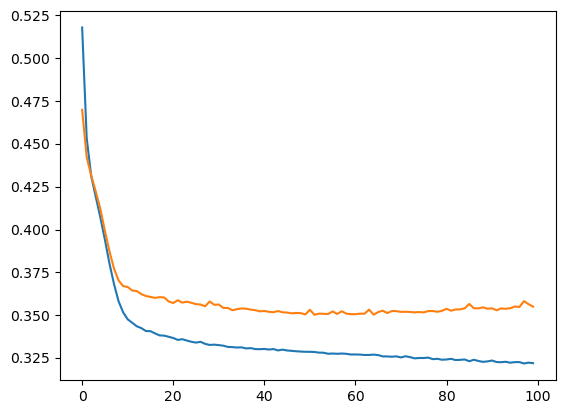

In [80]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])